# Market Analysis

Let's do a deep dive on one specific market, in this case Cape Coral, Florida. 

Cape Coral has been a hot market due to an influx of listing activity and declining home prices. Let's get into the lab and 
take a peak at whats going on. 

**Note** This notebook will work with any of the 70k+ markets supported by the Parcl Labs API.

As a reminder, you can get your Parcl Labs API key [here](https://dashboard.parcllabs.com/signup) to follow along. 

In [9]:
import os

import plotly.express as px
from parcllabs import ParclLabsClient


api_key = os.getenv('PARCL_LABS_API_KEY')

In [2]:
client = ParclLabsClient(api_key=api_key)

In [5]:
# lets find cape coral metro (i.e. CBSA)

results = client.search_markets.retrieve(
    query='Cape Coral',
    location_type='CBSA',
    as_dataframe=True
)

results

,parcl_id,country,geoid,state_fips_code,name,state_abbreviation,region,location_type
0,2899822,USA,15980,None,"Cape Coral-Fort Myers, Fl",None,None,CBSA


In [6]:
# we will use the cape coral parcl id of 2899822 throughout the rest of our analysis
cape_coral_parcl_id = results.iloc[0]['parcl_id']
cape_coral_parcl_id

2899822

In [20]:
# first order of business, lets see how new listings have changed over the last year

start_date = '2021-01-01'

new_listings = client.for_sale_market_metrics_new_listings_rolling_counts.retrieve(
    parcl_id=cape_coral_parcl_id,
    start_date=start_date,
    as_dataframe=True,
    params={
        'limit': 300
    }
)
new_listings.tail()

,date,rolling_7_day,rolling_30_day,rolling_60_day,rolling_90_day,parcl_id
168,2021-02-01,182,689,1191,1756,2899822
169,2021-01-25,141,585,1130,1710,2899822
170,2021-01-18,192,531,1138,1670,2899822
171,2021-01-11,154,471,1076,1638,2899822
172,2021-01-04,87,472,1044,1634,2899822


In [52]:
import pandas as pd
new_listings_long = pd.melt(
    new_listings, 
    id_vars=['date', 'parcl_id'], 
    value_vars=['rolling_30_day', 'rolling_60_day', 'rolling_90_day'],
    value_name='Number of New Listings',
    var_name='Rolling Window (Days)'
)

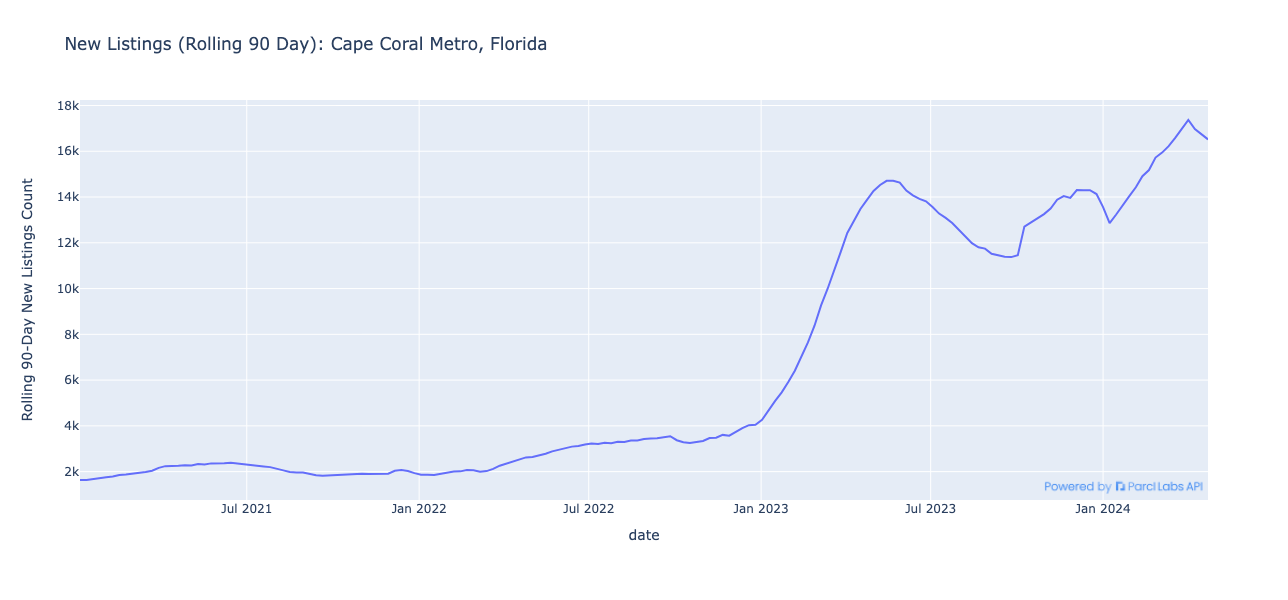

In [53]:
# Creating the line chart
fig = px.line(
    new_listings, 
    x='date', 
    y='rolling_90_day', 
    title='New Listings (Rolling 90 Day): Cape Coral Metro, Florida',
    labels={'rolling_90_day': 'Rolling 90-Day New Listings Count'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    dict(
        source="https://parcllabs-assets.s3.amazonaws.com/powered-by-parcllabs-api.png",
        xref="paper",
        yref="paper",
        x=1,
        y=0, 
        sizex=0.15, 
        sizey=0.15,
        xanchor="right",
        yanchor="bottom"
    )
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
)

# Show the plot
fig.show()

In [43]:
new_listings_long.head()

,date,parcl_id,variable,rolling_window
0,2024-04-22,2899822,rolling_7_day,1125
1,2024-04-15,2899822,rolling_7_day,1059
2,2024-04-08,2899822,rolling_7_day,1027
3,2024-04-01,2899822,rolling_7_day,1056
4,2024-03-25,2899822,rolling_7_day,1069


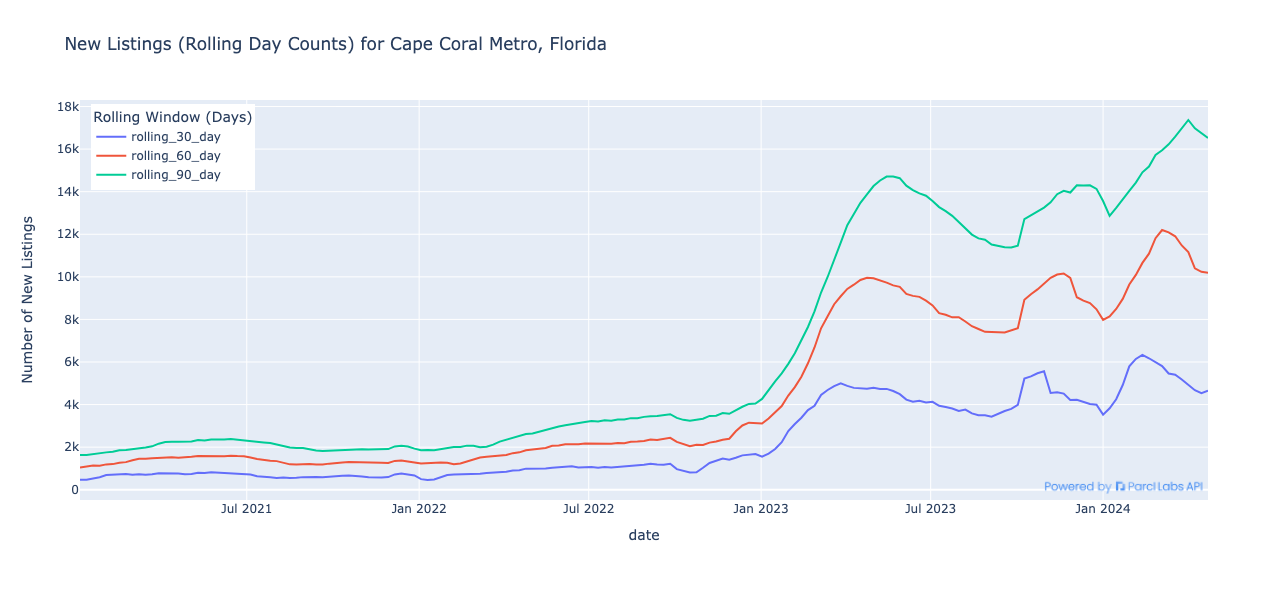

In [59]:
# Creating the line chart
fig = px.line(
    new_listings_long,
    x='date',
    y='Number of New Listings',
    color='Rolling Window (Days)',  # This will create a separate line for each rolling window
    title='New Listings (Rolling Day Counts) for Cape Coral Metro, Florida',
    labels={'count': 'Rolling Day Count'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    dict(
        source="https://parcllabs-assets.s3.amazonaws.com/powered-by-parcllabs-api.png",
        xref="paper",
        yref="paper",
        x=1,
        y=0, 
        sizex=0.15, 
        sizey=0.15,
        xanchor="right",
        yanchor="bottom"
    )
)

fig.update_layout(
    margin=dict(b=100),
    height=600,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top'
    ),
)

# Show the plot
fig.show()

In [ ]:
# 90 Day 1/2/2023 4,266, 4/22/2024 16.5k up 286%
# 60 Day 1/2/2023 3,110, 4/22/2024 10.2k up 228%
# 30 Day 1/2/2023 1,551, 4/22/2024 4,649 up 200%